### Exercise on Diffusion
- Use the forward difference scheme in
\begin{equation}
\frac{\phi^{n+1}_{j} - \phi^{n}_{j}}{\Delta t} = K \left( \frac{\phi^{n}_{j+1} - 2 \phi^{n}_{j} + \phi^{n}_{j-1}}{\Delta x^{2}} \right)
\end{equation}
to solve the diffusion problem
\begin{equation}
\frac{\partial \phi}{\partial t} = K \frac{\partial^{2}\phi}{\partial x^{2}}.
\end{equation}
Use a spatial resolution $\Delta x = 0.01\,m$ with a diffusion coefficient $K = 2.9E^{-5}$. Integrate for at least $6$ hours and show the solution every hour. Let the initial condition be the following function, describing the temperature distribution along a $1\,m$ metal rod heated in the middle point and with extrema kept at a constant temperature of $T_0 = 273.15\,K$ (Dirichlet boundary condition):
\begin{align}
    \phi(x, 0) & = \left\{\begin{array}{ll}
      273.15+20x+\sin{(50\pi x)} \quad \mathrm{for} \quad 0 \leq x \leq 0.5 \\
      273.15+20 - 20x+\sin{(50\pi x)} \quad \mathrm{for} \quad 0.5 < x \leq 1
\end{array} \right. \\
    \phi(0, t) & = 273.15 \quad \forall t \\
    \phi(1, t) & = 273.15 \quad \forall t   
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class FTdiffusion:
    def __init__(self, K, T0, x0, x1, t0, t1, dx, dt, tp):
        self.T0 = T0
        self.x0 = x0  
        self.x1 = x1 
        self.t0 = t0
        self.t1 = t1
        self.dx = dx
        self.dt = dt
        self.tp = tp
        self.K = K
        self.nx = round((x1 - x0) / dx) + 1
        self.x = np.linspace(x0, x1, self.nx)
        self.phi = np.array([self.phi0(xi) for xi in self.x])
        self.mult = self.K*dt/(dx**2)

    def phi0(self, x):
        if x >=0 and x <= 0.5:
            return self.T0 + 20*x + np.sin(50*np.pi*x)
        elif x > 0.5 and x <= 1:
            return self.T0 + 20 - 20*x + np.sin(50*np.pi*x)
        else:
            return self.T0

    def fds(self, phi_now):
        phi_now[0] = self.T0
        phi_now[-1] = self.T0
        phi_now[1:-1] = phi_now[1:-1] + self.mult *(phi_now[2:] - 2.0 * phi_now[1:-1] + phi_now[:-2])
        return phi_now


    def plot(self):
        t = self.t0
        plt.plot(self.x, self.phi, label=f'$\phi$({int(t)})')
        while t < self.t1:
            phi_new = self.fds(self.phi)
            self.phi[:] = phi_new
            t += self.dt

            if np.mod(t, self.tp) < self.dt:
                plt.plot(self.x, self.phi, label=f'$\phi$({int(t/3600)} hr)')
        plt.xlabel('x')
        plt.ylabel('T')
        plt.suptitle(r'Forward FD Scheme $\quad \frac{\partial \phi}{\partial t} = K \, \frac{\partial^{2} \phi}{\partial x^{2}}$', fontsize=14)
        plt.title(rf'$\Delta t =$ {np.round(self.dt,2)}, $K =$ {self.K}')
        plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
        plt.tight_layout()  # Ensures everything fits properly
        plt.savefig(f'FDSchemeDiffEq_dt={self.dt}.png')
        plt.show()

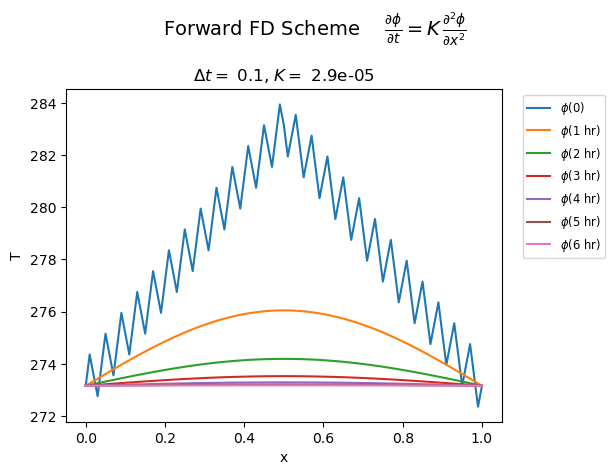

In [30]:
# Define parameters
K = 0.000029
T0 = 273.15
x0 = 0.0
x1 = 1.0
t0 = 0.0
t1 = 6*60*60
dt = 0.1
dx = 0.01
tp = 60*60

# Create and plot
FTdiffusion(K, T0, x0, x1, t0, t1, dx, dt, tp).plot()